# Planning observations with `astroplan`

In [1]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget

# Time and Dates
- ### All dates and times in are UTC: *Coordinated Universal Time* .
- All `Time` calculation assume that the time is UTC.
- UTC is related to  Greenwich Mean Time (GMT) but does not change with a change of seasons.
- Time will default to 00:00:00 UTC.

In [2]:
my_date1 = Time("2017-11-06 13:40:15", format='iso')

my_date1

<Time object: scale='utc' format='iso' value=2017-11-06 13:40:15.000>

In [3]:
my_date1.value

'2017-11-06 13:40:15.000'

In [4]:
my_date2 = Time("2017-11-06", format='iso')

my_date2

<Time object: scale='utc' format='iso' value=2017-11-06 00:00:00.000>

### Current UTC Time

In [5]:
current_time = Time.now()    # Current UTC Time

current_time

<Time object: scale='utc' format='datetime' value=2017-11-13 21:31:59.059084>

In [6]:
print("The current time is {0}".format(current_time))

The current time is 2017-11-13 21:31:59.059084


### Different Date Formats

In [7]:
print("The current Julian Date is {0:.2f}".format(current_time.jd))

print("The current Modified Julian Date is {0:.2f}".format(current_time.mjd))

print("The current unix Epoch is {0:.2f}".format(current_time.unix))  # Seconds since (Jan 01, 1970 00:00:00 UTC)

print("The current fraction of a year is {0:.2f}".format(current_time.decimalyear))

The current Julian Date is 2458071.40
The current Modified Julian Date is 58070.90
The current unix Epoch is 1510608719.06
The current fraction of a year is 2017.87


### Math with Time and Dates

In [8]:
print("In 1 hour and 25 minutes it will be {0} UTC".format(current_time + 1*u.h + 25*u.min))

In 1 hour and 25 minutes it will be 2017-11-13 22:56:59.059084 UTC


In [9]:
Christmas = Time("2017-12-25 00:00:00", format='iso')

delta_xmas = Christmas - current_time

print("It is {0:.2f} days until christmas, which is {1:.2f} fortnights, or {2:.2f} seconds"
      .format(delta_xmas.to(u.d),delta_xmas.to(u.fortnight),delta_xmas.to(u.s)))

It is 41.10 d days until christmas, which is 2.94 fortnight fortnights, or 3551280.94 s seconds


### Working with timezones (local time)

- The python package `pytz` is used to try to deal with local timezones
- [Timezone List](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)
- Only use timezone conversions for printouts, NEVER calculations!
- Working with tomezones is a [quick path to maddness!](https://xkcd.com/1883/)

In [10]:
my_timezone = pytz.timezone('US/Pacific')

local_now = current_time.to_datetime(my_timezone)

In [11]:
print("The current local time is {0}".format(local_now))

The current local time is 2017-11-13 13:31:59.059084-08:00


In [12]:
# Nepal is in a strange timezone!

everest_timezone = pytz.timezone('Asia/Kathmandu')

everest_local_now = current_time.to_datetime(everest_timezone)

In [13]:
print("The current local time on Mt. Everest is {0}".format(everest_local_now))

The current local time on Mt. Everest is 2017-11-14 03:16:59.059084+05:45


---

### [Accurate Time](http://bmmorris.blogspot.com/2015/06/ut1-utc-and-astropy.html) - `UT1`

`AstroPy` calculates the times of events to a very high accuracy. To do this, is has to account for the fact that  Earth's rotation period is constantly changing due to tidal forces and changes in the Earth's moment of inertia.

To do this, `AstroPy` uses a time convention called `UT1`. This system is tied to the rotation of the Earth with repect to the positions of distant quasars. Since the Earth's rotation is constantly changing, the time system `UT1` is constanly changing with repect to `UTC`. 

The orientation of the Earth, which must be measured continuously to keep `UT1` accurate. This measurement is logged by the International Earth Rotation and Reference Systems Service (IERS). They publish a "bulletin" with the most recent measurements of the Earth's orientation. This bulletin is constantly being updated.

You will run into occasions when you will get a warning that your dates are out of range of the IERS bulletin. To update the bulletin, run the follow block of code:

---

In [14]:
from astroplan import download_IERS_A

download_IERS_A()

# Places

## Setting your location - `Observer`

In [15]:
astrolab = Observer(longitude = -122.311473 * u.deg,
                    latitude = 47 * u.deg + 39 * u.arcmin + 15 * u.arcsec,
                    elevation = 63.4 * u.m,
                    timezone = 'US/Pacific',
                    name = "Astrolab"
                    )

In [16]:
astrolab

<Observer: name='Astrolab',
    location (lon, lat, el)=(-122.31147299999999 deg, 47.65416666666668 deg, 63.40000000035419 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>

### Information at your location

In [17]:
sunset_here = astrolab.sun_set_time(current_time, which='nearest')

print("Sunset will be at {0.iso} UTC".format(sunset_here))

Sunset will be at 2017-11-14 00:28:55.279 UTC


In [18]:
print("Sunset will be at {0} local time".format(sunset_here.to_datetime(my_timezone)))

Sunset will be at 2017-11-13 16:28:55.278578-08:00 local time


### MRO

The [Manastash Ridge Observatory (MRO)](https://sites.google.com/a/uw.edu/mro/) is operated by the Astronomy Department of the University of Washington, for the training of graduate and undergraduate students, as well as for astronomical research.

In [19]:
mro = Observer.at_site('mro')  # many observatories are built-in to astroplan

mro

<Observer: name='mro',
    location (lon, lat, el)=(-120.7278 deg, 46.95280000000002 deg, 1198.000000001222 m),
    timezone=<UTC>>

In [20]:
sunset_mro = mro.sun_set_time(current_time, which='nearest')

print("Sunset at MRO will be at {0} local time".format(sunset_mro.to_datetime(my_timezone)))

Sunset at MRO will be at 2017-11-13 16:24:44.878005-08:00 local time


In [21]:
(sunset_here - sunset_mro).to(u.min)

<Quantity 4.1733428835868835 min>

### Local Siderial Time (LST) will tell you the Right Ascension on the meridian right now.

- You can use a [star chart](./Astro_Coordinates.pdf) to find what constellations are visible now.

In [22]:
midnight_mro = mro.midnight(current_time, which='next')

mro.local_sidereal_time(midnight_mro)

<Longitude 3.3163480485461783 hourangle>

## When can you observe?

### Astronomical twilight is when the Sun is 18 degrees below the horizon

In [23]:
astro_set = mro.twilight_evening_astronomical(current_time, which='nearest')  
astro_rise = mro.twilight_morning_astronomical(current_time, which='next')

print("Astronomical Evening Twilight starts at {0.iso} UTC".format(astro_set))
print("Astronomical Midnight is at {0.iso} UTC".format(midnight_mro))
print("Astronomical Morning Twilight starts at {0.iso} UTC".format(astro_rise))

Astronomical Evening Twilight starts at 2017-11-14 02:15:45.323 UTC
Astronomical Midnight is at 2017-11-14 07:47:28.088 UTC
Astronomical Morning Twilight starts at 2017-11-14 13:19:25.520 UTC


In [24]:
observing_length = (astro_rise - astro_set).to(u.h)

print("You can observe for {0:.1f} at MRO tonight".format(observing_length))

You can observe for 11.1 h at MRO tonight


In [25]:
# Local Times

print("Tonight's observing at MRO starts at {0},\n peaks at {1} and,\n ends at {2} local time"
      .format(astro_set.to_datetime(my_timezone),
              midnight_mro.to_datetime(my_timezone),
              astro_rise.to_datetime(my_timezone)))

Tonight's observing at MRO starts at 2017-11-13 18:15:45.322667-08:00,
 peaks at 2017-11-13 23:47:28.087576-08:00 and,
 ends at 2017-11-14 05:19:25.519716-08:00 local time


# Things

## Objects in the sky - `FixedTarget`

### You can define targets by [coordinates](./Astro_Coordinates.pdf)

In [26]:
coords = SkyCoord('02h19m00.0s', '+57d07m042s', frame='icrs')

ngc869 = FixedTarget(name='NGC869', coord=coords)

In [27]:
ngc869.ra

<Longitude 34.74999999999999 deg>

In [28]:
ngc869.ra.hms

hms_tuple(h=2.0, m=18.0, s=59.999999999999147)

### Can you see the object?

In [29]:
mro.target_is_up(midnight_mro, ngc869)

True

### Where can you see it a midnight?

In [30]:
where_to_look = mro.altaz(midnight_mro, ngc869)

In [31]:
where_to_look.alt

<Latitude 76.40148297994561 deg>

In [32]:
where_to_look.az

<Longitude 324.3143960616925 deg>

### Most targets can be defined by name

In [33]:
my_target = FixedTarget.from_name("m31")

In [34]:
my_target.coord 

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.684793,  41.269065)>

In [35]:
my_target.ra.hms

hms_tuple(h=0.0, m=42.0, s=44.350320000000636)

## Objects in the sky - Moving Targets (solar system targets)

- `Astropy` used the `jplephem` package to calculate the positions
- The built-in solar system objects are: 'sun', 'mercury', 'venus', 'earth-moon-barycenter', 'earth', 'moon', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto'

In [36]:
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination

### Is the Sun above the horizion now?

In [37]:
sun_now = get_body('sun',current_time)

sun_now

<SkyCoord (GCRS: obstime=2017-11-13 21:31:59.059084, obsgeoloc=( 0.,  0.,  0.) m, obsgeovel=( 0.,  0.,  0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    ( 229.02561193, -18.12280742,  0.98944514)>

In [38]:
sun_location = astrolab.altaz(current_time, sun_now)

sun_location.alt, sun_location.az

(<Latitude 20.560770728871493 deg>, <Longitude 204.97938248429793 deg>)

In [39]:
moon_now = get_body('moon',current_time)

In [40]:
moon_illumination(current_time)

0.19844380947065693

In [41]:
sun_now.separation(moon_now)

<Angle 52.78709117789713 deg>

### You can turn solar system objects into pseudo `FixedTarget` objects for observational planning

In [42]:
moon_midnight = FixedTarget(name='Moon', coord=get_body('moon',midnight_mro))

In [43]:
moon_midnight

<FixedTarget "Moon" at SkyCoord (GCRS: obstime=2458071.8246306432, obsgeoloc=( 0.,  0.,  0.) m, obsgeovel=( 0.,  0.,  0.) m / s): (ra, dec, distance) in (deg, deg, km) ( 185.28214469,  1.56988995,  389568.98714044)>

# Planning - Observing at MRO

### [Air Mass](https://en.wikipedia.org/wiki/Air_mass_%28astronomy%29) is the optical path length through Earth’s atmosphere. 

* At sea-level, the air mass at the zenith is 1. 
* Air mass increases as you move toward the horizon.
* Air mass at the horizon is approximately 38.
* The best time to observe a target is at minimum airmass.
* When the airmass of your target is getting close to 2, you should be observing another target.

In [44]:
my_target = FixedTarget.from_name("m31")

In [45]:
mro.target_is_up(midnight_mro, my_target)

True

### Object is up at midnight at MRO - good

In [46]:
altaz_my_target = astrolab.altaz(midnight_mro, my_target)

altaz_my_target.alt, altaz_my_target.az

(<Latitude 62.99694539857273 deg>, <Longitude 270.446493053521 deg>)

### Nice high altitude - looking good

In [47]:
# You can find the airmass by using the .secz method

altaz_my_target.secz

<Quantity 1.1223567272137032>

### Airmass < 2, you are good to go.

## Planning observation is easier with plots

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range

from astroplan.plots import plot_sky, plot_airmass

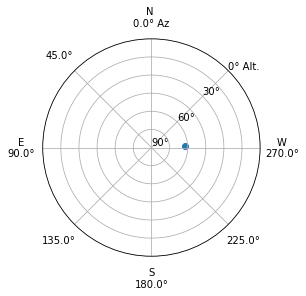

In [49]:
plot_sky(my_target, mro, midnight_mro);

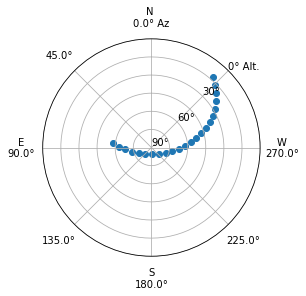

In [50]:
start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

plot_sky(my_target, mro, time_grid);

### Plot the airmass of the target over the night

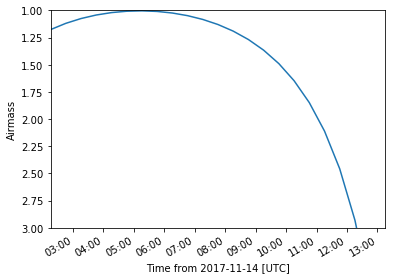

In [51]:
plot_airmass(my_target, mro, time_grid);

#### This is good target for observation at MRO for most of the night

### Not all targets can (or should) be observed at all locations

In [52]:
low_target = FixedTarget.from_name("Diphda")

In [53]:
mro.target_is_up(midnight_mro, low_target)

True

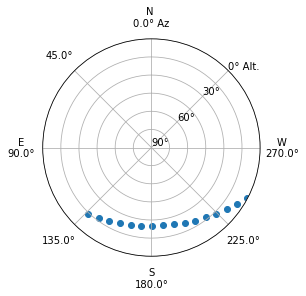

In [54]:
plot_sky(low_target, mro, time_grid);

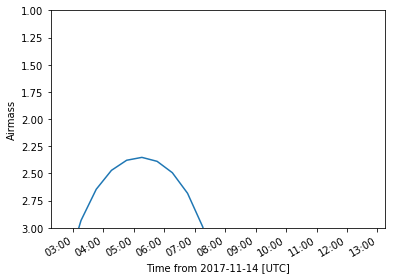

In [55]:
plot_airmass(low_target, mro, time_grid);

#### Not looking good

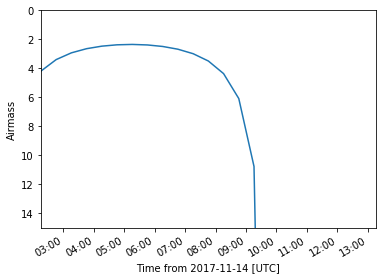

In [56]:
# astroplan sets the default limits of the airmass plot to [3,0].
# If you want to see a target at a higher airmass you have to set the limits yourself.

fig,ax = plt.subplots(1,1)

plot_airmass(low_target, mro, time_grid)
ax.set_ylim([15,0]);

As you can see, this is bad target for observation at MRO.

### Finder Charts - (Warning: This may not always work depending on the Skyview website)

In [57]:
from astroplan.plots import plot_finder_image
from astroquery.skyview import SkyView

(<matplotlib.axes._subplots.WCSAxesSubplot at 0x1fa6a563320>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x1fa6a54e710>)

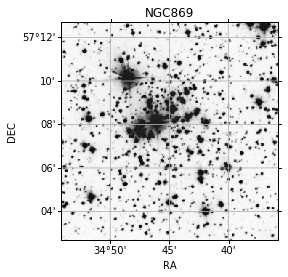

In [58]:
plot_finder_image(ngc869)

(<matplotlib.axes._subplots.WCSAxesSubplot at 0x1fa6bc53198>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x1fa6bc372e8>)

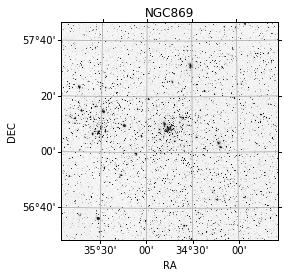

In [59]:
# plot_finder_image defaults to a field of view of 10 u*arcmin
# You can specify a different fov

plot_finder_image(ngc869, fov_radius= 1.3 * u.degree)

(<matplotlib.axes._subplots.WCSAxesSubplot at 0x1fa699e0198>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x1fa699938d0>)

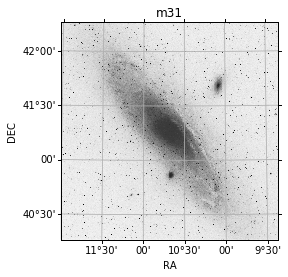

In [60]:
plot_finder_image(my_target, fov_radius= 120 * u.arcmin)